<a href="https://colab.research.google.com/github/vivekdcn/Signal-Processing/blob/master/freq_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import os
import numpy as np
import pandas as pd
import scipy
from scipy.io import wavfile
from scipy import signal
from scipy.signal import butter, lfilter, hilbert, chirp
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt


In [83]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [84]:
fs = 90
duration = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs

In [85]:
signal = chirp(t, 1.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

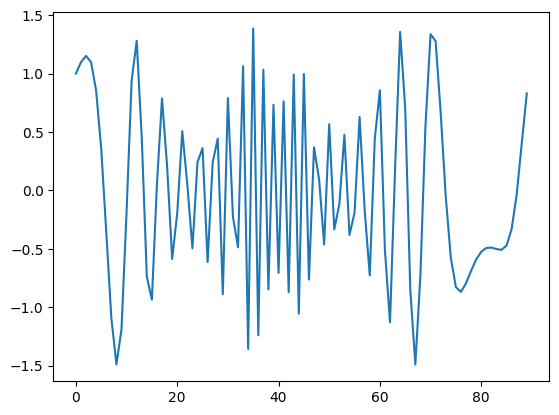

In [86]:
plt.plot(signal)

In [87]:
lowcut = 7.5
highcut = 12

In [89]:
#Filter the signal
signal_f = butter_bandpass_filter(signal, lowcut, highcut, fs, order = 3)

In [91]:
#Perform Fourier Transform on Unfiltered Signal

fourierTransform = np.fft.fft(signal)/len(signal)
fourierTransform = fourierTransform[range(int(len(signal)/2))]

In [92]:
tpCount     = len(signal)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/fs
frequencies = values/timePeriod

Text(0, 0.5, 'Amplitude')

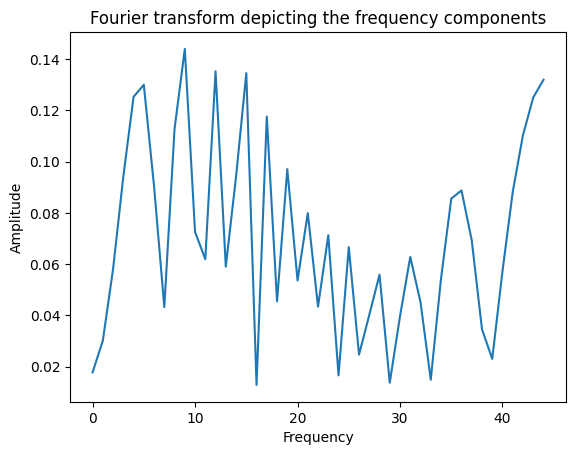

In [93]:
# Frequency domain representation
figure, axis = plt.subplots()
plt.subplots_adjust(hspace=1)

axis.set_title('Fourier transform depicting the frequency components')
axis.plot(frequencies, abs(fourierTransform))
axis.set_xlabel('Frequency')
axis.set_ylabel('Amplitude')

Note the frequency range in the above plot.

In [95]:
#Perform Fourier Transform on Filtered Signal

fourierTransform = np.fft.fft(signal_f)/len(signal_f)
fourierTransform = fourierTransform[range(int(len(signal_f)/2))]

In [96]:
tpCount     = len(signal_f)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/fs
frequencies = values/timePeriod

Text(0, 0.5, 'Amplitude')

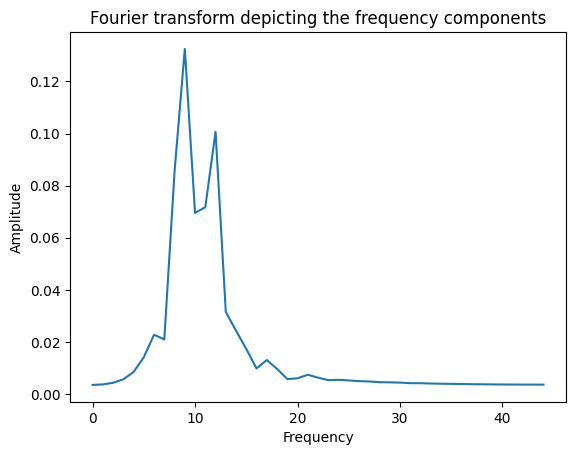

In [97]:
# Frequency domain representation
figure, axis = plt.subplots()
plt.subplots_adjust(hspace=1)

axis.set_title('Fourier transform depicting the frequency components')
axis.plot(frequencies, abs(fourierTransform))
axis.set_xlabel('Frequency')
axis.set_ylabel('Amplitude')

Notice the change in the frequency of a signal from a previous graph.

In [98]:
print("Signal Shape = ", signal.shape, "Filtered Signal Shape = ", signal_f.shape)

Signal Shape =  (90,) Filtered Signal Shape =  (90,)


When applying a frequency filter to a signal, the length of the data points typically remains the same. This is because the filter operates on the frequency domain representation of the signal, without changing the underlying time domain data points.

Here's an overview of the process:

The input signal, represented as a series of data points in the time domain, is transformed into the frequency domain using a Fourier transform (such as the Fast Fourier Transform - FFT).

In the frequency domain, the filter modifies the amplitude or phase of specific frequency components based on its design parameters. This modification selectively attenuates or allows certain frequencies to pass through, while suppressing others.

After applying the filter in the frequency domain, an inverse Fourier transform is performed to convert the modified signal back to the time domain.

The resulting time domain signal retains the same length as the original signal, as the filtering process operates on the spectral content (frequencies) rather than altering the time domain representation. The filter affects the amplitudes or phases of the frequency components but doesn't introduce any additional data points or change the temporal duration of the signal.